In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

In [3]:
# Backwards Euler Method

dt = 1e-2
t  = np.arange(0, 20, dt)

def f(t, u):
    return u + t

u0 = 1
u  = np.zeros_like(t) # Backwards Euler
v  = np.zeros_like(t) # Forwards Euler
w  = np.zeros_like(t) # Crank-Nicolson

for i in range(len(t)):
    if i == 0:
        u[0] = u0
        v[0] = u0
        w[0] = u0
    else:
        # Backwards Euler
        ti   = t[i]
        uk   = u[i-1]
        u[i] = fsolve(lambda ui: ui - uk - dt*f(ti, ui), uk)[0]

        # Forwards Euler
        tk   = t[i-1]
        vk   = v[i-1]
        v[i] = vk + dt*f(tk, vk)
        
        # Crank-Nicolson
        wk   = w[i-1]
        w[i] = fsolve(lambda wi: wi - wk - 0.5*dt*(f(ti, wi) + f(tk, wk)), wk)[0]


ys = solve_ivp(fun=f, t_span=[t[0], t[-1]], y0=[u0], t_eval=t).y[0]

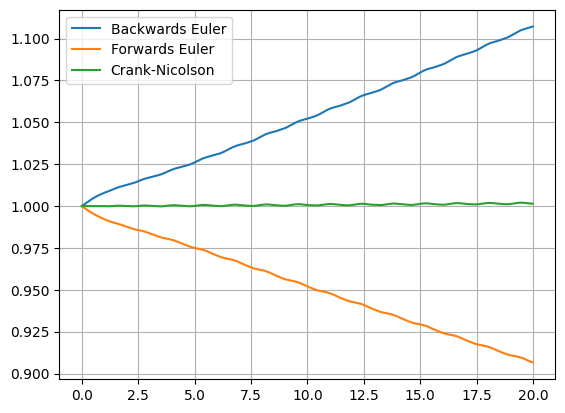

In [4]:
plt.plot(t, u/ys, label='Backwards Euler')
plt.plot(t, v/ys, label='Forwards Euler')
plt.plot(t, w/ys, label='Crank-Nicolson')
plt.grid()
plt.legend()
plt.show()

In [5]:
dx = 1e-1
def D2u(n):
    """
    Second derivative Matrix for 1D grid with Neumann boundary conditions.
    Assumes Neumann boundary conditions at the boundaries.
    n: number of grid points
    """
    D2 = np.zeros((n, n))
    for i in range(1, n-1):
        D2[i, [i-1, i, i+1]] = [1, -2, 1]
    D2[0, [0, 1]]    = [-2, 2]
    D2[-1, [-2, -1]] = [2, -2]
    return 1/dx * D2

In [14]:
from scipy.sparse import diags
from scipy.sparse.linalg import factorized

def D2v(n):
    return diags([1, -2, 1], [-1, 0, 1], shape=(n, n)).toarray()

D2v(5)

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [29]:
A = np.linspace(7, 21, 5)
diags(A, 0, shape=(5, 5)).toarray()

array([[ 7. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , 10.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 14. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , 17.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. , 21. ]])

In [ ]:
(diags([1, -2, 1], [-1, 0, 1], shape=(5, 5)) - diags(A, 0, shape=(5, 5)))

array([[ -9. ,   1. ,   0. ,   0. ,   0. ],
       [  1. , -12.5,   1. ,   0. ,   0. ],
       [  0. ,   1. , -16. ,   1. ,   0. ],
       [  0. ,   0. ,   1. , -19.5,   1. ],
       [  0. ,   0. ,   0. ,   1. , -23. ]])

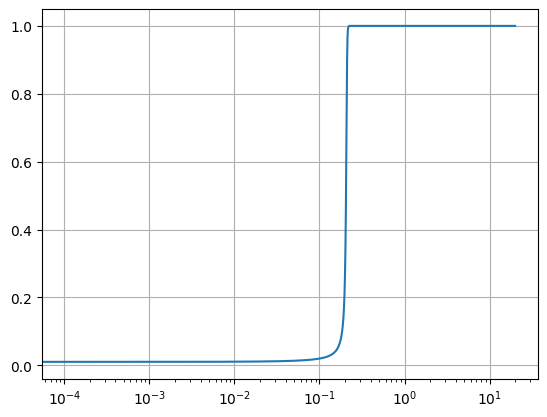

In [36]:
# Crank Nicolson Method

dt = 1e-4
t  = np.arange(0, 20, dt)

def f(t, u):
    return 500*u**2 * (1 - u)

u0 = 1e-2
u  = np.zeros_like(t)

for i in range(len(t)):
    if i == 0:
        u[0] = u0
    else:
        j  = i-1
        tj = t[j]
        uj = u[j]
        u[i] = fsolve(lambda ui: ui - uj - 0.5*dt*(f(ti, ui) + f(tj, uj)), uj)[0]

plt.plot(t, u, label='Crank Nicolson')
plt.xscale('log')
plt.grid()
plt.show()


In [41]:
def u_0(x):
    "Initial Condition"
    s = 0.2
    m = 0
    return 1/(np.pi*s**2)**(0.25) * np.exp(-0.5 * ((x-m)/s)**2)

L = 5
dx = 1e-3
x = np.arange(-L-dx, L+dx, dx)
np.trapz(np.abs(u_0(x))**2, x)

0.9999999999999999